# House Price Predicitons

This is the homework of 02-regression from machine learning zoomcamp

## Goal

The goal of this homework is to create a regression model for predicting housing prices from the column `median_house_value`.

## Dataset

The dataset for this homework will use California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

The link below to download with the `wget` command:
(https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv)

## Libraries

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Download dataset

In [6]:
if not Path('housing.csv').is_file:
    print('File exist')
else:
    print('Downloading dataset...')
    !mkdir dataset
    !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
    !mv housing.csv ./dataset/    

mkdir: dataset: File exists
--2022-09-19 21:44:36--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8000::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M   618KB/s    in 2.2s    

2022-09-19 21:44:39 (618 KB/s) - ‘housing.csv’ saved [1423529/1423529]



## EDA

Now, Our dataset is downloaded and save in the dataset folder with the name `housing.csv`. 

Use the `Pandas` to read csv dataset as DataFrame. 

In this past will do the following EDA.

- Load the data
- Look at the `median_house_value` variable. Does it have a long tail?

In [206]:
# Read data and show first five rows.
df = pd.read_csv('./dataset/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [207]:
# Check the number of rows and columns in the dataframe.
shape = df.shape
print(f"this dataset has {shape[0]} rows and {shape[1]} columns")

this dataset has 20640 rows and 10 columns


In [208]:
# Check datatype.
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

Most columns are numeric except `ocean_proximity` column. 

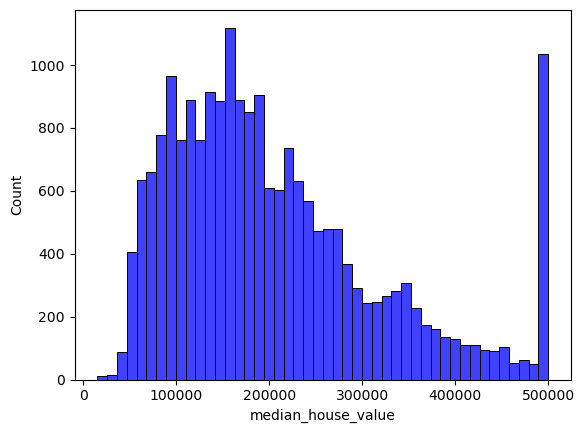

In [209]:
# Look at `median_house_value` variable
sns.histplot(df['median_house_value'], color='blue')
plt.show()

The distribution is not like a normal distribution for the `median_house_value` column. It's look like long tail.

## Features

Let's drop the column that don't neccessary for this homework. That's `ocean_proximity` column.

In [210]:
# Drop column from dataframe and show first five rows.
df = df.drop(columns='ocean_proximity', axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


### Question 1

Find a feature with missing values. How many missing values does it have?

In [211]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

The `total_bedrooms` columns has missing values about 207 columns.

### Question 2
What's the median (50% percentile) for variable `population`?

In [212]:
pop_median = df['population'].median()
print(f"The median for population is: {int(pop_median)}")

The median for population is: 1166


### Split the data

- Shuffle the initial dataset, use seed 42
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Make sure that the target value (`median_house_value`) is not in your dataframe
- Apply the log transformation to the `median_house_value` variable using `np.log1p()` function.

In [213]:
# set the random seed for reproducible purpose.
np.random.seed(42)

# create array of index that equal to the number of rows in our dataframe.
idx = np.arange(df.shape[0])
np.random.shuffle(idx) # Shuffle the index

In [214]:
# Check the number of rows again from the dataframe
n = len(df)

test_num = int(n * .2)
val_num = int(n * .2)
train_num = n - test_num - val_num

print(f"train dataset: {train_num}")
print(f"val dataset: {val_num}")
print(f"test dataset: {test_num}")

dataset_num = train_num + val_num + test_num
assert(dataset_num == n)

train dataset: 12384
val dataset: 4128
test dataset: 4128


In [215]:
# Split and shuffle the dataset into train, validate, and test and reset the index
df_train = df.iloc[idx[:train_num]].reset_index(drop=True)
df_val = df.iloc[idx[train_num:train_num + val_num]].reset_index(drop=True)
df_test = df.iloc[idx[train_num + val_num:]].reset_index(drop=True)

df_train.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [216]:
# Create the target variable for train, validate, and test.
y_train = df_train['median_house_value'].values
y_val = df_val['median_house_value'].values
y_test = df_test['median_house_value'].values

print('example of target values from train dataset')
y_train

example of target values from train dataset


array([ 47700.,  45800., 500001., ..., 146800., 151800., 420300.])

In [217]:
# Clear the target variable from the other features.
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [218]:
# Apply log transformation to the `median_house_value` column
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

print('example of the target values after log transformation')
y_train

example of the target values after log transformation


array([10.77270764, 10.7320612 , 13.12236738, ..., 11.89683321,
       11.93032573, 12.9487264 ])

### Question 3

- We need to deal with missing values for the columne from Q1
- We have to options
    - fill it with 0
    - the mean of this variable
- Try both options for each train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only.
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using `round(score, 2)
- Which option gives better RMSE?

Options: 

- With 0
- With mean
- Both are equaly good

### Prepare dataset

In [219]:
# Create function to prepare X with the option to handle with missing values.
def prepare_X(df: pd.DataFrame, options :str=None):
    
    '''
    Get the dataframe and make the copy of dataframe then use the copy one.
    to handle the missing values from the column with the 2 different methods
    and return X
    '''
    
    df = df.copy() # make the copy
    if options == 0: # fill na with 0 value
        df['total_bedrooms'] = df['total_bedrooms'].fillna(0)
        X = df.values
    elif options == 'mean': # fill na with mean of the variable
        mean = df['total_bedrooms'].mean()
        df['total_bedrooms'] = df['total_bedrooms'].fillna(mean)
        X = df.values
    else: # do noting
        X = df.values
    
    return X

In [220]:
# Apply the function to train set with 0 metohd and check the result
X_train_0 = prepare_X(df_train, options=0)
if np.isnan(X_train_0.any()) == False:
    print('The function is works')
    print(X_train_0[:5])
else:
    print('Please check the function again')

The function is works
[[-1.1901e+02  3.6060e+01  2.5000e+01  1.5050e+03  0.0000e+00  1.3920e+03
   3.5900e+02  1.6812e+00]
 [-1.1946e+02  3.5140e+01  3.0000e+01  2.9430e+03  0.0000e+00  1.5650e+03
   5.8400e+02  2.5313e+00]
 [-1.2244e+02  3.7800e+01  5.2000e+01  3.8300e+03  0.0000e+00  1.3100e+03
   9.6300e+02  3.4801e+00]
 [-1.1872e+02  3.4280e+01  1.7000e+01  3.0510e+03  0.0000e+00  1.7050e+03
   4.9500e+02  5.7376e+00]
 [-1.2193e+02  3.6620e+01  3.4000e+01  2.3510e+03  0.0000e+00  1.0630e+03
   4.2800e+02  3.7250e+00]]


In [221]:
# Apply the function to train set with mean method and check the result
X_train_mean = prepare_X(df_train, options='mean')
if np.isnan(X_train_0.any()) == False:
    print('The function is works')
    print(X_train_mean[:5])
else:
    print('Please check the function again')

The function is works
[[-1.19010000e+02  3.60600000e+01  2.50000000e+01  1.50500000e+03
   5.33480332e+02  1.39200000e+03  3.59000000e+02  1.68120000e+00]
 [-1.19460000e+02  3.51400000e+01  3.00000000e+01  2.94300000e+03
   5.33480332e+02  1.56500000e+03  5.84000000e+02  2.53130000e+00]
 [-1.22440000e+02  3.78000000e+01  5.20000000e+01  3.83000000e+03
   5.33480332e+02  1.31000000e+03  9.63000000e+02  3.48010000e+00]
 [-1.18720000e+02  3.42800000e+01  1.70000000e+01  3.05100000e+03
   5.33480332e+02  1.70500000e+03  4.95000000e+02  5.73760000e+00]
 [-1.21930000e+02  3.66200000e+01  3.40000000e+01  2.35100000e+03
   5.33480332e+02  1.06300000e+03  4.28000000e+02  3.72500000e+00]]


### Training

In [258]:
def linear_regression(X, y):
    
    '''
    Get X, y and create the linear regression function
    return the first weight and the rest as separate value
    '''
    ones = np.ones(X.shape[0])
    
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [259]:
# Train the model with the zero method
w0_zero, ws_zero = linear_regression(X_train_0, y_train)
w0_zero, ws_zero

(-11.68697524167803,
 array([-2.76255120e-01, -2.82087184e-01,  2.91329621e-03, -8.64531514e-06,
         1.50811922e-04, -2.08205659e-04,  5.69546573e-04,  1.71308139e-01]))

In [224]:
# Train the model with the mean method
w0_mean, ws_mean = linear_regression(X_train_mean, y_train)
w0_mean, ws_mean

(-11.759590872104194,
 array([-2.76809637e-01, -2.82182103e-01,  2.93033801e-03, -1.48543785e-05,
         2.48054046e-04, -2.03763456e-04,  4.87004092e-04,  1.73086593e-01]))

Now, got the two models with two methods from the training session.
then let's make the prediciton for validation set to check the result.

### Prediction

In [225]:
# X validation set
X_val = prepare_X(df_val)
X_val

array([[-1.2085e+02,  3.7510e+01,  1.5000e+01, ...,  7.2800e+02,
         2.8100e+02,  1.5531e+00],
       [-1.1825e+02,  3.4090e+01,  5.2000e+01, ...,  1.2110e+03,
         4.1700e+02,  2.9350e+00],
       [-1.2202e+02,  3.7310e+01,  3.4000e+01, ...,  1.3010e+03,
         4.3100e+02,  6.0830e+00],
       ...,
       [-1.2071e+02,  3.8340e+01,  1.6000e+01, ...,  5.5900e+02,
         2.1300e+02,  4.4531e+00],
       [-1.1713e+02,  3.2910e+01,  1.6000e+01, ...,  1.6190e+03,
         5.8400e+02,  4.0000e+00],
       [-1.1793e+02,  3.3710e+01,  1.0000e+01, ...,  1.5810e+03,
         6.3300e+02,  4.1366e+00]])

In [226]:
# Apply the linear regression model with validation set (0 method)
y_pred_0 = w0_zero + X_val.dot(ws_zero)

# Apply the linear regression model with validation set (mean method)
y_pred_mean = w0_mean + X_val.dot(ws_mean)

### Evaluation

In [227]:
def rmse(y, y_pred):
    
    '''
    Get the target lable and target prediction
    calculate the rmse and return
    '''
    
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [228]:
# Calculate RMSE on 0 method
score_0 = rmse(y_val, y_pred_0)
print(f"the score from 0 method: {round(score_0, 2)}")

# Calculate RMSE on mean method
score_mean = rmse(y_val, y_pred_mean)
print(f"the score from mean method: {round(score_mean, 2)}")

the score from 0 method: 0.33
the score from mean method: 0.33


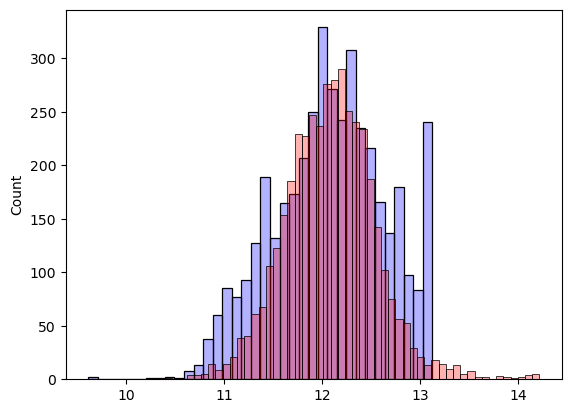

In [229]:
# Look at prediction from 0 method
sns.histplot(y_val, color='blue', alpha=0.3)
sns.histplot(y_pred_0, color='red', alpha=0.3)
plt.show()

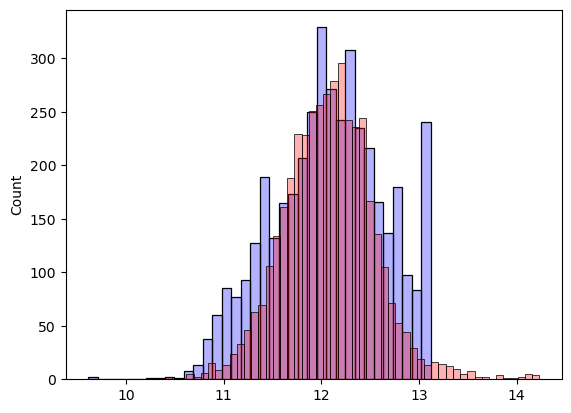

In [230]:
# Look at prediction from mean method
sns.histplot(y_val, color='blue', alpha=0.3)
sns.histplot(y_pred_mean, color='red', alpha=0.3)
plt.show()

Now, the results from both method are the same.

### Question 4

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?


If there are multiple options, select the smallest r.

Options:

- 0
- 0.000001
- 0.001
- 0.0001


In [231]:
def linear_regression_reg(X, y, r=0):

    '''
    Get X, y and create the linear regression function and apply 
    the reguralization method with the training session
    return the first weight and the rest as separate value
    '''
    
    ones = np.ones(X.shape[0])
    
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [232]:
# Apply the linear regression with regularization function with 0 method 
r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
rmse_scores = list()

for r in r_values:
    w0, w = linear_regression_reg(X_train_0, y_train, r=r)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    rmse_scores.append(score)

df_scores = pd.DataFrame({'regularization': r_values, 'rmse_score': rmse_scores})
df_scores['rounded_score'] = round(df_scores['rmse_score'], 2)
df_scores = df_scores.sort_values(by=['rmse_score'], ascending=True).reset_index(drop=True)
df_scores

,regularization,rmse_score,rounded_score
0,0.010000,0.329532,0.33
1,0.001000,0.329533,0.33
2,0.000100,0.329533,0.33
3,0.000001,0.329533,0.33
4,0.000000,0.329533,0.33
5,0.100000,0.329695,0.33
6,1.000000,0.333789,0.33
7,5.000000,0.339249,0.34
8,10.000000,0.340606,0.34


From the given options of `regularization` parameters. the best result is `0.329532` from regularization with `0.010000`.

### Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

Options:

- 0.16
- 0.00005
- 0.005
- 0.15555

In [277]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = list()
idx = np.arange(df.shape[0])

for seed in seed_values:
    
    # Set the random seed for each round and shuffle the index
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    # Split and shuffle dataset
    df_train = df.iloc[idx[:train_num]].reset_index(drop=True)
    df_val = df.iloc[idx[train_num:train_num + val_num]].reset_index(drop=True)
    df_test = df.iloc[idx[train_num + val_num:]].reset_index(drop=True)
    
    # Craete target values
    y_train = df_train['median_house_value'].values
    y_val = df_val['median_house_value'].values
    y_test = df_test['median_house_value'].values
    
    # Apply log transformation with the target values
    y_train = np.log1p(y_train)
    y_val = np.log1p(y_val)
    y_test = np.log1p(y_test)

    # Drop the target column from the others.
    df_train.drop(columns='median_house_value', axis=1, inplace=True)
    df_val.drop(columns='median_house_value', axis=1, inplace=True)
    df_test.drop(columns='median_house_value', axis=1, inplace=True)

    # Prepare features with 0 method to fill in missing values
    X_train_0 = prepare_X(df_train, options=0)
    X_val_0 = prepare_X(df_val, options=0)

    # Train the model with linear regression
    w0, w = linear_regression(X_train_0, y_train)
    
    # Prediction
    y_pred = w0 + X_val_0.dot(w)
    
    # Evaluate
    score = rmse(y_val, y_pred)
    
    # Log the result
    scores.append(score)
    
scores

[0.33884304805301835,
 0.3390390788697872,
 0.34923218040157405,
 0.3419297993819196,
 0.34815786336454374,
 0.3443996643814707,
 0.34905238454657184,
 0.34002331473065117,
 0.34127013234886594,
 0.3379486120144645]

In [280]:
# Calculate standard deviation of rmse score
print(f"Standard deviation of rmse score: {round(np.std(scores), 3)}")


Standard deviation of rmse score: 0.004


The closest option for the our standard deviation is `0.005`

### Question 6

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

Options:

- 0.35
- 0.135
- 0.450
- 0.245

In [283]:
np.random.seed(9)
idx = np.arange(df.shape[0])
np.random.shuffle(idx)

df_train = df.iloc[idx[:train_num]].reset_index(drop=True)
df_val = df.iloc[idx[train_num:train_num + val_num]].reset_index(drop=True)
df_test = df.iloc[idx[train_num + val_num:]].reset_index(drop=True)

y_train = df_train['median_house_value'].values
y_val = df_val['median_house_value'].values
y_test = df_test['median_house_value'].values

y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)


del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

df_full = pd.concat([df_train, df_val]).reset_index(drop=True)
df_full.info()
display(df_full.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.80,38.67,10.0,2086.0,380.0,1073.0,378.0,4.5526
1,-117.97,33.66,22.0,3914.0,600.0,1871.0,607.0,5.8541
2,-124.25,40.28,32.0,1430.0,419.0,434.0,187.0,1.9417
3,-117.11,32.69,37.0,2395.0,627.0,2489.0,599.0,1.5933
4,-118.37,34.21,36.0,1392.0,326.0,1181.0,303.0,3.1563


In [289]:
print(df_full.isnull().sum())
print()
print(df_test.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
dtype: int64

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        39
population             0
households             0
median_income          0
dtype: int64


In [292]:
X_full_train = prepare_X(df_full, options=0)
X_test = prepare_X(df_test, options=0)

y_full_train = np.concatenate([y_train, y_val])

w0, w = linear_regression_reg(X_full_train, y_full_train, r=0.001)
y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred)
print(f"RMSE score: {round(score, 2)}")

RMSE score: 0.35
